In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as scs 
import statsmodels.api as sm

In [22]:
filepath = '../Data/auto-mpg.csv'
cars = pd.read_csv(filepath)
cars.head()
cars.dropna(inplace=True)

In [23]:
mean_and_median_per_country = cars.groupby('origin').agg({'mpg': ['mean', 'median'], 'horsepower': ['mean', 'median'], 'weight': ['mean', 'median'], 'acceleration': ['mean', 'median']})
mean_and_median_per_country


mpg         horsepower              weight         acceleration  \
             mean median        mean median         mean  median         mean   
origin                                                                          
europe  27.602941   26.0   80.558824   76.5  2433.470588  2240.0    16.794118   
japan   30.450633   31.6   79.835443   75.0  2221.227848  2155.0    16.172152   
usa     20.033469   18.5  119.048980  105.0  3372.489796  3381.0    14.990204   

               
       median  
origin         
europe   15.6  
japan    16.4  
usa      15.0

In [37]:
# Perform the aggregation
median_per_year = cars.groupby('model_year').mean([['weight', 'acceleration', 'horsepower', 'mpg']])
median_per_year.reset_index(inplace=True)
median_per_year

,model_year,mpg,cylinders,displacement,horsepower,weight,acceleration
0,70,17.689655,6.758621,281.413793,147.827586,3372.793103,12.948276
1,71,21.111111,5.629630,213.888889,107.037037,3030.592593,15.000000
2,72,18.714286,5.821429,218.375000,120.178571,3237.714286,15.125000
3,73,17.100000,6.375000,256.875000,130.475000,3419.025000,14.312500
4,74,22.769231,5.230769,170.653846,94.230769,2878.038462,16.173077
5,75,20.266667,5.600000,205.533333,101.066667,3176.800000,16.050000
6,76,21.573529,5.647059,197.794118,101.117647,3078.735294,15.941176
7,77,23.375000,5.464286,191.392857,105.071429,2997.357143,15.435714
8,78,24.061111,5.361111,177.805556,99.694444,2861.805556,15.805556
9,79,25.093103,5.827586,206.689655,101.206897,3055.344828,15.813793


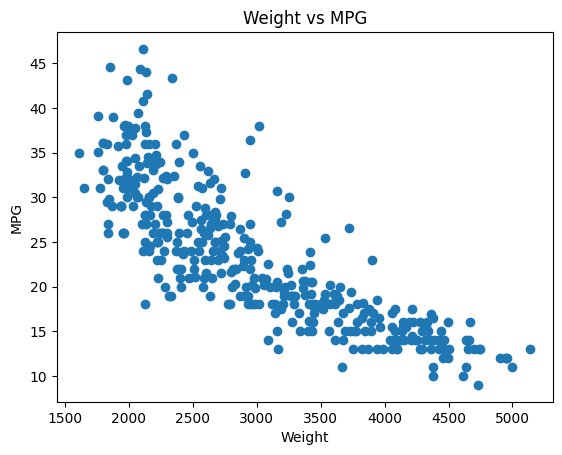

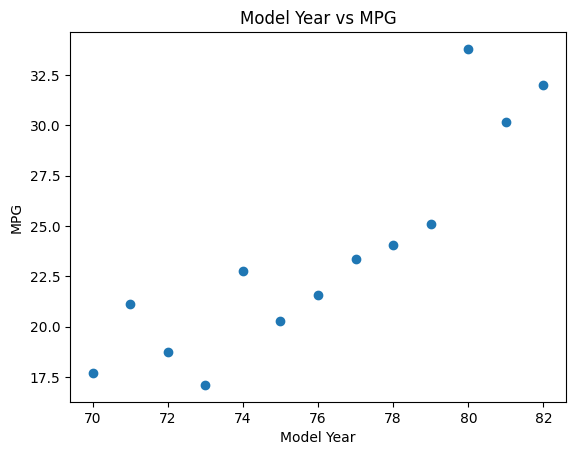

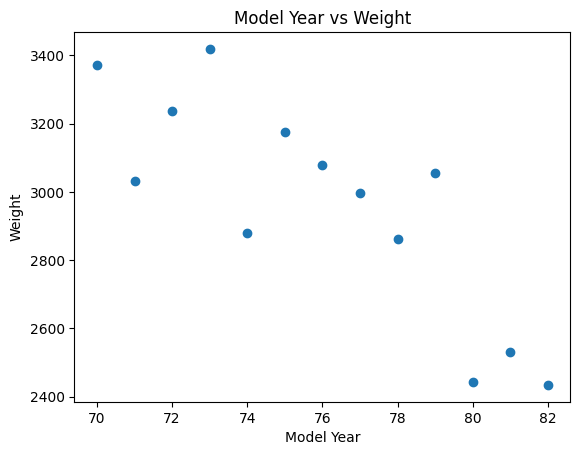

In [38]:
# Scatter plot: weight vs mpg
plt.scatter(cars['weight'], cars['mpg'])
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.title('Weight vs MPG')
plt.show()

# Scatter plot: model_year vs mpg
plt.scatter(median_per_year['model_year'], median_per_year['mpg'])
plt.xlabel('Model Year')
plt.ylabel('MPG')
plt.title('Model Year vs MPG')
plt.show()

# Scatter plot: model_year vs weight
plt.scatter(median_per_year['model_year'], median_per_year['weight'])
plt.xlabel('Model Year')
plt.ylabel('Weight')
plt.title('Model Year vs Weight')
plt.show()
